In [3]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# For reading stock data from yahoo
from __future__ import division
from pandas_datareader import DataReader
#import fix_yahoo_finance as yf

# For time stamps
from datetime import datetime

In [5]:
# List of Tech_stocks for analytics
tech_list = ['FL','GOOG','TM','SPOT','FB']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing Yahoo finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [6]:
FL.head()

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2018-04-18  43.790001  42.299999  42.740002  42.419998  2168200.0  41.007381
2018-04-19  42.200001  40.919998  42.150002  41.639999  3084900.0  40.583416
2018-04-20  41.830002  40.689999  41.439999  40.880001  3347100.0  39.842705
2018-04-23  41.619999  40.450001  41.119999  41.209999  2615700.0  40.164330
2018-04-24  42.320000  41.029999  41.540001  41.709999  2343900.0  40.651646

In [7]:
FL.describe()

High         Low        Open       Close        Volume  \
count  253.000000  253.000000  253.000000  253.000000  2.530000e+02   
mean    53.162964   51.631383   52.427866   52.413221  2.999056e+06   
std      5.741442    5.711500    5.798241    5.724450  2.432576e+06   
min     41.619999   40.020000   40.500000   40.520000  3.429820e+05   
25%     49.000000   47.320000   48.060001   48.119999  2.115800e+06   
50%     52.939999   51.619999   52.320000   52.180000  2.608400e+06   
75%     57.389999   56.160000   56.849998   56.779999  3.160800e+06   
max     68.000000   63.669998   67.849998   64.449997  3.079220e+07   

        Adj Close  
count  253.000000  
mean    51.621684  
std      5.897652  
min     39.491840  
25%     47.315250  
50%     51.226337  
75%     56.211960  
max     64.064735

In [8]:
# General Info
FL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-04-18 to 2019-04-18
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


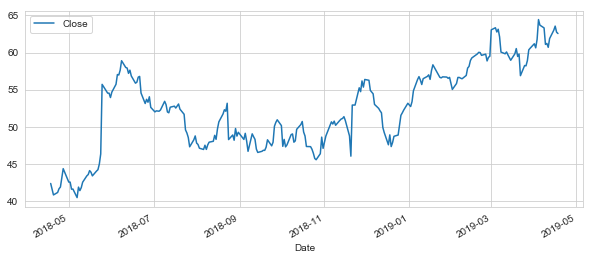

In [9]:
# Let's see a historical view of the closing price
FL['Close'].plot(legend=True, figsize=(10,4))

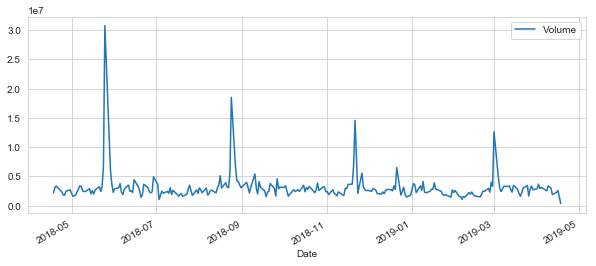

In [10]:
# Now let's plot the total volume of stock being traded each day over the past year

FL['Volume'].plot(legend=True, figsize=(10,4))

In [13]:
# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
from numpy import *

MA_day = [10,20,50,100]
s1 = pd.Series(MA_day)

for ma in s1:
    column_name = 'MA for %s days' %(str(ma))
    FL[column_name] = pd.Series.rolling(FL['Close'],ma).mean()

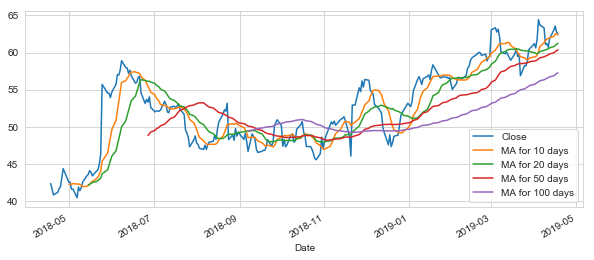

In [14]:
FL[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

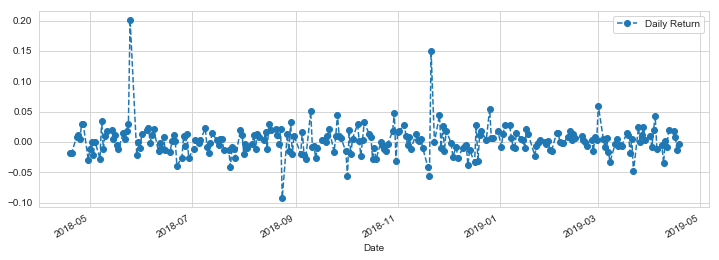

In [15]:
# We'll use pct_change to find the percent change for each day
FL['Daily Return'] = FL['Close'].pct_change()

# Lets plot the daily return percentage
FL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

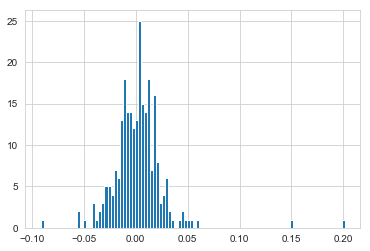

In [16]:
# only with histogram
FL['Daily Return'].hist(bins=100)

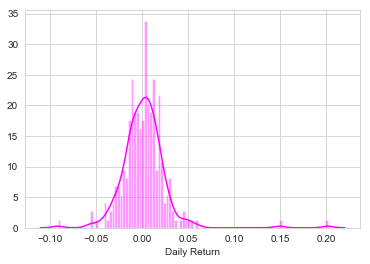

In [17]:
import warnings
warnings.filterwarnings("ignore")
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(FL['Daily Return'].dropna(), bins=100, color='magenta')

In [18]:
# Grab all the closing prices for the tech stock list into one DataFrame

closingprice_df = DataReader(tech_list, 'yahoo', start, end)['Close']

In [19]:
closingprice_df.head(10)

Symbols             FB         FL         GOOG        SPOT          TM
Date                                                                  
2018-04-18  166.360001  42.419998  1072.079956  154.910004  129.070007
2018-04-19  168.100006  41.639999  1087.699951  153.470001  128.490005
2018-04-20  166.279999  40.880001  1072.959961  158.449997  129.229996
2018-04-23  165.839996  41.209999  1067.449951  158.039993  129.070007
2018-04-24  159.690002  41.709999  1019.979980  155.070007  129.470001
2018-04-25  159.690002  41.939999  1021.179993  153.330002  131.100006
2018-04-26  174.160004  43.160000  1040.040039  156.600006  131.610001
2018-04-27  173.589996  44.410000  1030.050049  159.979996  131.009995
2018-04-30  172.000000  43.080002  1017.330017  161.669998  130.979996
2018-05-01  173.860001  42.610001  1037.310059  164.880005  130.970001

In [20]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [21]:
tech_returns.head()

Symbols           FB        FL      GOOG      SPOT        TM
Date                                                        
2018-04-18       NaN       NaN       NaN       NaN       NaN
2018-04-19  0.010459 -0.018388  0.014570 -0.009296 -0.004494
2018-04-20 -0.010827 -0.018252 -0.013552  0.032449  0.005759
2018-04-23 -0.002646  0.008072 -0.005135 -0.002588 -0.001238
2018-04-24 -0.037084  0.012133 -0.044470 -0.018793  0.003099

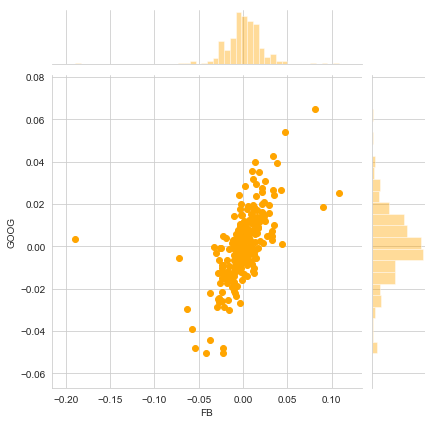

In [22]:
# We'll use joinplot to compare the daily returns of Facebook and Google.
sns.jointplot('FB','GOOG',tech_returns,kind='scatter',color='orange')

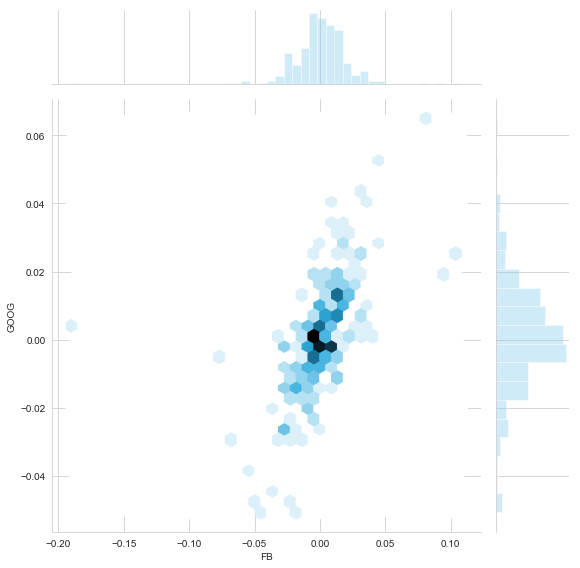

In [23]:
# with Hex plot
sns.jointplot('FB','GOOG',tech_returns, kind='hex',height=8, color='skyblue')

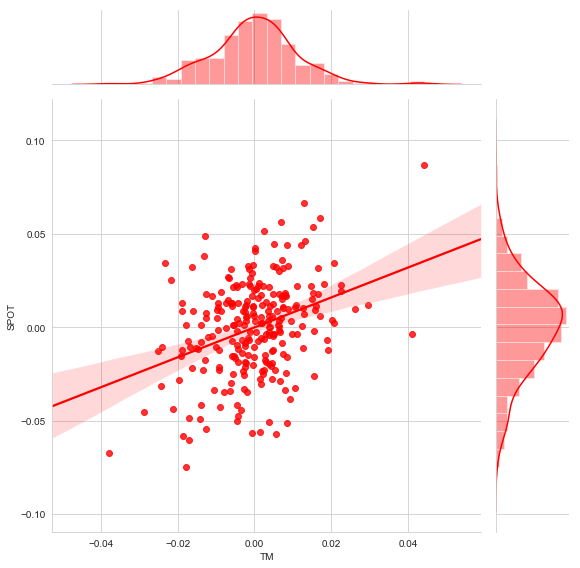

In [24]:
# Lets check out for Toyota Motor Corporation and Spotify with reg jointplot
import scipy.stats

sns.jointplot('TM','SPOT',tech_returns, kind='reg', height=8, color='red')

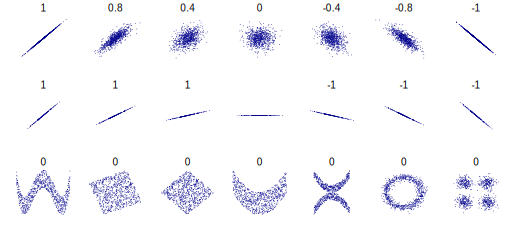

In [25]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

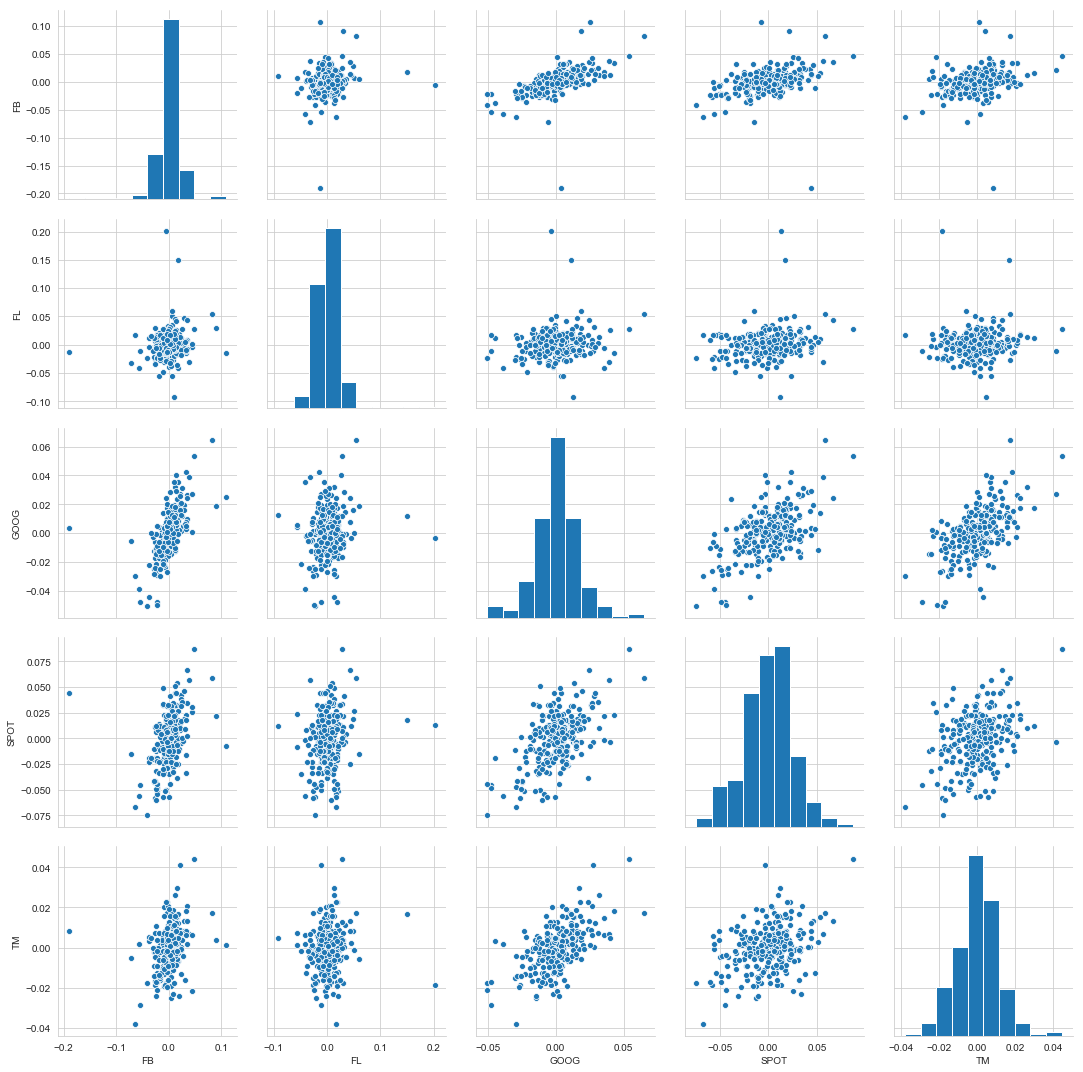

In [26]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(),height=3)

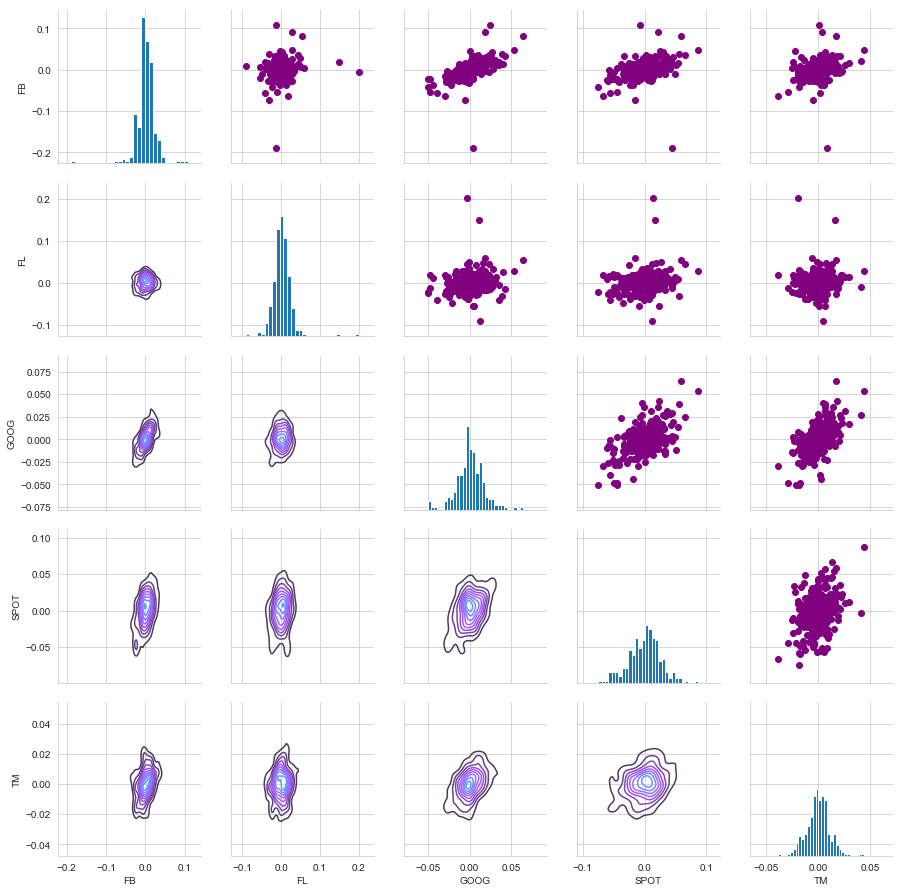

In [27]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

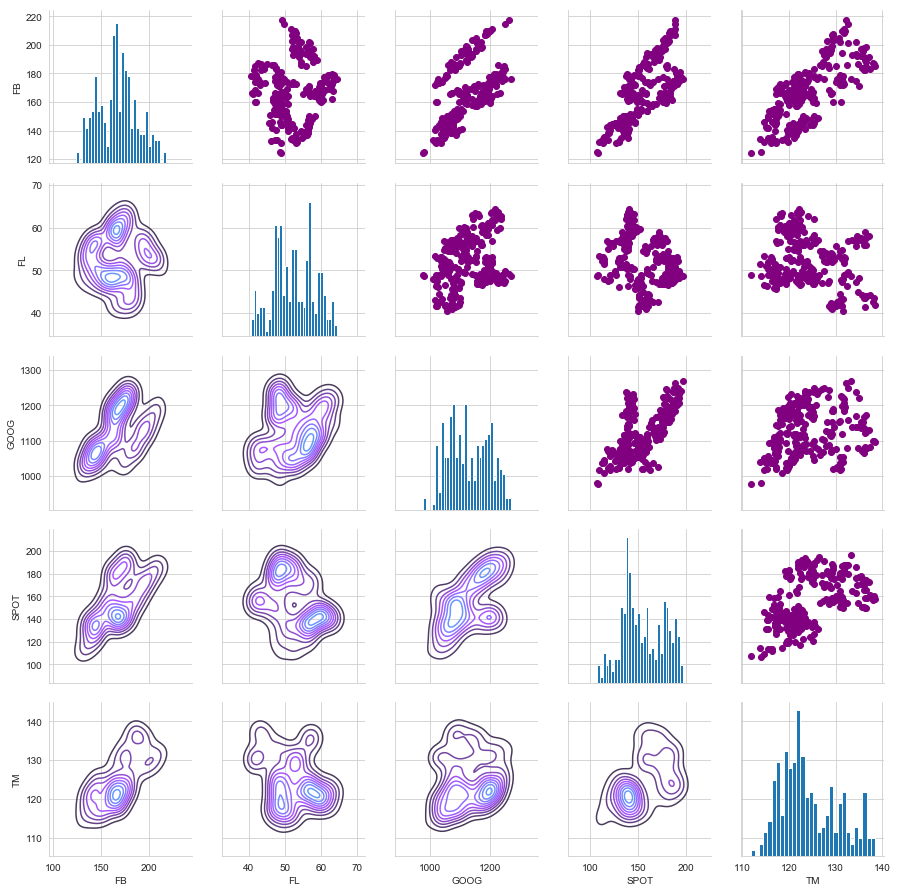

In [28]:

# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

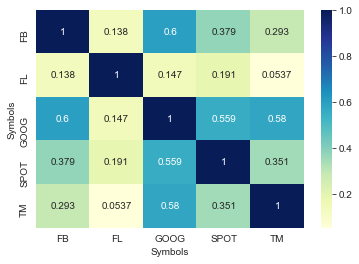

In [29]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

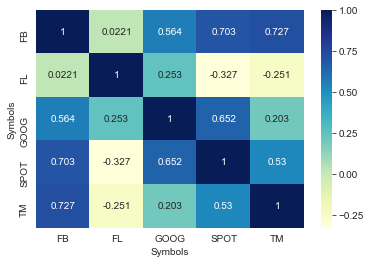

In [30]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [31]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [32]:
rets.head()

Symbols           FB        FL      GOOG      SPOT        TM
Date                                                        
2018-04-19  0.010459 -0.018388  0.014570 -0.009296 -0.004494
2018-04-20 -0.010827 -0.018252 -0.013552  0.032449  0.005759
2018-04-23 -0.002646  0.008072 -0.005135 -0.002588 -0.001238
2018-04-24 -0.037084  0.012133 -0.044470 -0.018793  0.003099
2018-04-25  0.000000  0.005514  0.001177 -0.011221  0.012590

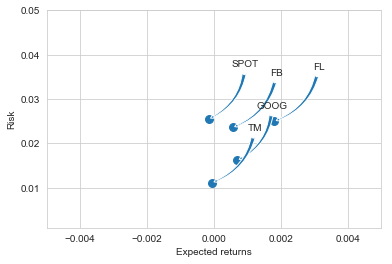

In [33]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.005,0.005])
plt.ylim([0.001,0.05])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

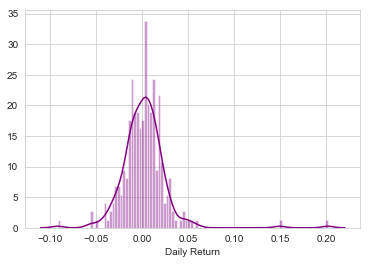

In [34]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(FL['Daily Return'].dropna(),bins=100,color='purple')

In [35]:
# The 0.05 empirical quantile of daily returns

# For FL stocks
rets["FL"].quantile(0.05)

-0.030438622260610188

In [36]:
# For FB stocks
rets["FB"].quantile(0.05)

-0.027313409031411592

In [37]:
# For SPOT stocks
rets["SPOT"].quantile(0.05)

-0.04795578485854223

In [38]:
# For TM stocks
rets["TM"].quantile(0.05)

-0.018628701917313844

In [39]:
# For GOOG stocks
rets["GOOG"].quantile(0.05)

-0.025507603860642086

In [40]:
rets.head()

Symbols           FB        FL      GOOG      SPOT        TM
Date                                                        
2018-04-19  0.010459 -0.018388  0.014570 -0.009296 -0.004494
2018-04-20 -0.010827 -0.018252 -0.013552  0.032449  0.005759
2018-04-23 -0.002646  0.008072 -0.005135 -0.002588 -0.001238
2018-04-24 -0.037084  0.012133 -0.044470 -0.018793  0.003099
2018-04-25  0.000000  0.005514  0.001177 -0.011221  0.012590

In [41]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for Facebook
mu = rets.mean()['FB']

# Now let's grab the volatility of the stock from the std() of the average return for Facebook
sigma = rets.std()['FB']

In [42]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [43]:
# For Facebook Stock - Facebook
FB.head()

High         Low        Open       Close    Volume  \
Date                                                                   
2018-04-18  168.119995  165.770004  166.880005  166.360001  20969600   
2018-04-19  168.330002  165.199997  166.199997  168.100006  22235000   
2018-04-20  168.429993  165.809998  167.789993  166.279999  19119400   
2018-04-23  168.449997  165.089996  167.270004  165.839996  23088100   
2018-04-24  166.100006  158.190002  165.429993  159.690002  35079900   

             Adj Close  
Date                    
2018-04-18  166.360001  
2018-04-19  168.100006  
2018-04-20  166.279999  
2018-04-23  165.839996  
2018-04-24  159.690002

Text(0.5, 1.0, 'Monte Carlo Analysis for Facebook')

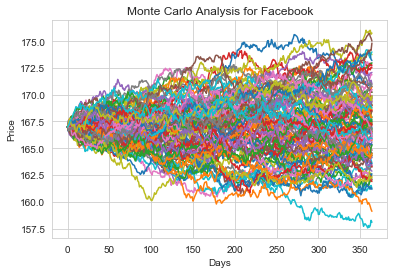

In [44]:
start_price = 166.97

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Facebook')

In [45]:
# For Google Stock - GOOG
GOOG.head()

High          Low         Open        Close   Volume  \
Date                                                                      
2018-04-18  1077.430054  1066.224976  1077.430054  1072.079956  1344100   
2018-04-19  1094.165039  1068.180054  1069.400024  1087.699951  1747700   
2018-04-20  1092.349976  1069.569946  1082.000000  1072.959961  1889700   
2018-04-23  1082.719971  1060.699951  1077.859985  1067.449951  2341300   
2018-04-24  1057.000000  1010.590027  1052.000000  1019.979980  4760300   

              Adj Close  
Date                     
2018-04-18  1072.079956  
2018-04-19  1087.699951  
2018-04-20  1072.959961  
2018-04-23  1067.449951  
2018-04-24  1019.979980

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

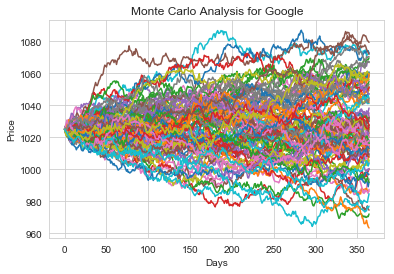

In [46]:
start_price = 1025.04

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [47]:
# For Tata Motors Stock - TM
TM.head()

High         Low        Open       Close    Volume  \
Date                                                                   
2018-04-18  129.630005  129.020004  129.470001  129.070007  199600.0   
2018-04-19  128.789993  128.000000  128.789993  128.490005  148000.0   
2018-04-20  129.339996  128.800003  128.949997  129.229996  214600.0   
2018-04-23  129.369995  128.740005  129.360001  129.070007  117600.0   
2018-04-24  130.639999  129.080002  130.500000  129.470001  145600.0   

             Adj Close  
Date                    
2018-04-18  127.256302  
2018-04-19  126.684448  
2018-04-20  127.414047  
2018-04-23  127.256302  
2018-04-24  127.650673

Text(0.5, 1.0, 'Monte Carlo Analysis for Tata Motors')

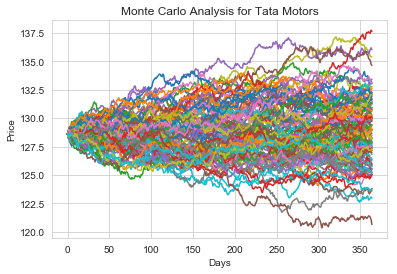

In [48]:
start_price = 128.58

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Tata Motors')

In [49]:
# For Foot Locker Stock - FL
FL.head()

High        Low       Open      Close     Volume  Adj Close  \
Date                                                                           
2018-04-18  43.790001  42.299999  42.740002  42.419998  2168200.0  41.007381   
2018-04-19  42.200001  40.919998  42.150002  41.639999  3084900.0  40.583416   
2018-04-20  41.830002  40.689999  41.439999  40.880001  3347100.0  39.842705   
2018-04-23  41.619999  40.450001  41.119999  41.209999  2615700.0  40.164330   
2018-04-24  42.320000  41.029999  41.540001  41.709999  2343900.0  40.651646   

            MA for 10 days  MA for 20 days  MA for 50 days  MA for 100 days  \
Date                                                                          
2018-04-18             NaN             NaN             NaN              NaN   
2018-04-19             NaN             NaN             NaN              NaN   
2018-04-20             NaN             NaN             NaN              NaN   
2018-04-23             NaN             NaN             NaN              NaN   
2018-04-24             NaN             NaN             NaN              NaN   

            Daily Return  
Date                      
2018-04-18           NaN  
2018-04-19     -0.018388  
2018-04-20     -0.018252  
2018-04-23      0.008072  
2018-04-24      0.012133

Text(0.5, 1.0, 'Monte Carlo Analysis for Foot Locker')

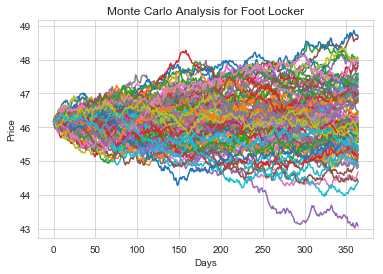

In [50]:
start_price = 46.16

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Foot Locker')

In [51]:
# For Spotify Stock - SPOT
SPOT.head()

High         Low        Open       Close   Volume  \
Date                                                                  
2018-04-18  155.990005  149.559998  149.940002  154.910004  2235300   
2018-04-19  155.029999  152.009995  154.399994  153.470001  1056900   
2018-04-20  159.000000  151.229996  152.350006  158.449997  2339000   
2018-04-23  160.679993  154.606003  159.399994  158.039993  2436500   
2018-04-24  159.259995  153.520004  159.000000  155.070007  1180400   

             Adj Close  
Date                    
2018-04-18  154.910004  
2018-04-19  153.470001  
2018-04-20  158.449997  
2018-04-23  158.039993  
2018-04-24  155.070007

Text(0.5, 1.0, 'Monte Carlo Analysis for Spotify')

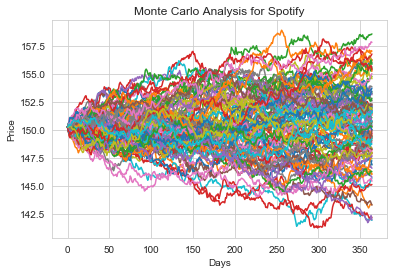

In [52]:
start_price = 150.25

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Spotify')

In [53]:
# Lets start with Google stock price
start_price = 1025.04

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock (GOOG) after 365 days')

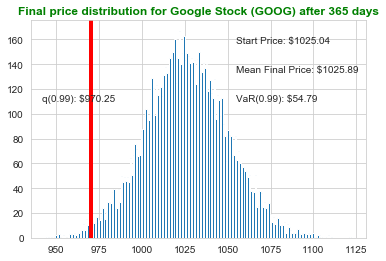

In [54]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Google Stock (GOOG) after %s days" % days, weight='bold', color='G')

In [55]:
# Facebook stock price
start_price = 166.97

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Facebook Stock (FB) after 365 days')

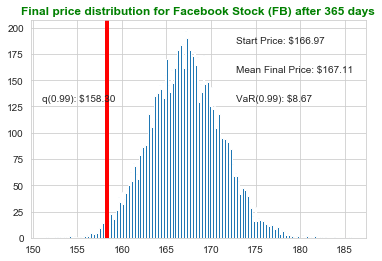

In [56]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Facebook Stock (FB) after %s days" % days, weight='bold', color='G')

In [57]:
# Foot Locker stock price
start_price = 46.16

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Foot Locker Stock (FL) after 365 days')

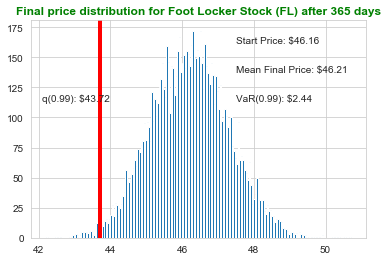

In [58]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Foot Locker Stock (FL) after %s days" % days, weight='bold', color='G')

In [59]:
# For Spotify stock price
start_price = 166.97

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Spotify Stock (SPOT) after 365 days')

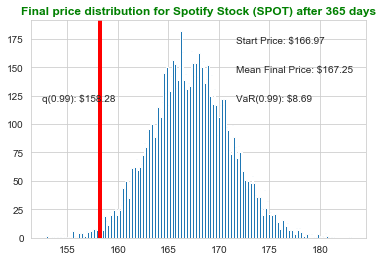

In [60]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Spotify Stock (SPOT) after %s days" % days, weight='bold', color='G')

In [61]:
# For Tata Motors stock price
start_price = 128.58

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Tata Motors Stock (TM) after 365 days')

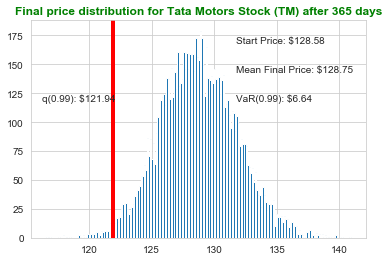

In [62]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Tata Motors Stock (TM) after %s days" % days, weight='bold', color='G')

In [63]:
# List of NYSE_stocks for analytics
NYSE_list = ['JNJ','NKE','WMT']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in NYSE_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [64]:
WMT.head()

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2018-04-18  88.559998  87.510002  88.199997  87.570000  5854000.0  85.589149
2018-04-19  88.040001  86.580002  87.410004  87.889999  6588300.0  85.901917
2018-04-20  88.379997  86.669998  87.870003  86.980003  8324900.0  85.012497
2018-04-23  87.080002  86.019997  86.889999  86.099998  7360500.0  84.152397
2018-04-24  86.910004  85.570000  86.769997  86.529999  8469700.0  84.572670

In [65]:
WMT.describe()

High         Low        Open       Close        Volume  \
count  253.000000  253.000000  253.000000  253.000000  2.530000e+02   
mean    93.971779   92.531067   93.210514   93.255731  8.223902e+06   
std      5.866435    5.791335    5.842815    5.816615  4.100098e+06   
min     82.519997   81.779999   81.959999   82.400002  2.064696e+06   
25%     88.379997   87.080002   87.650002   87.720001  5.879200e+06   
50%     95.610001   94.290001   94.989998   94.919998  7.362800e+06   
75%     98.419998   97.000000   97.709999   97.650002  9.352500e+06   
max    106.209999  104.809998  105.500000  105.559998  4.263130e+07   

        Adj Close  
count  253.000000  
mean    92.310492  
std      6.168471  
min     81.043465  
25%     86.275887  
50%     94.097435  
75%     97.129997  
max    104.425194

In [66]:
WMT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-04-18 to 2019-04-18
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


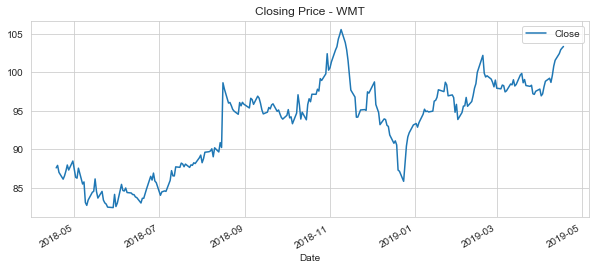

In [67]:
# Let's see a historical view of the closing price for Walmart
WMT['Close'].plot(title='Closing Price - WMT',legend=True, figsize=(10,4))

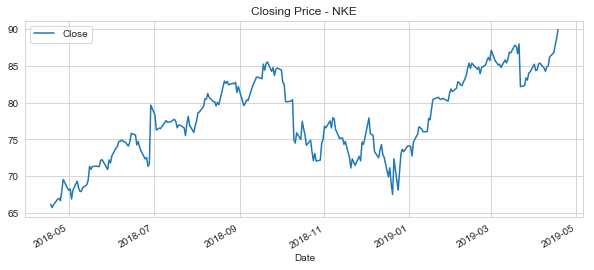

In [68]:
# Let's see a historical view of the closing price for NKE(Nike Inc.)
NKE['Close'].plot(title='Closing Price - NKE',legend=True, figsize=(10,4))

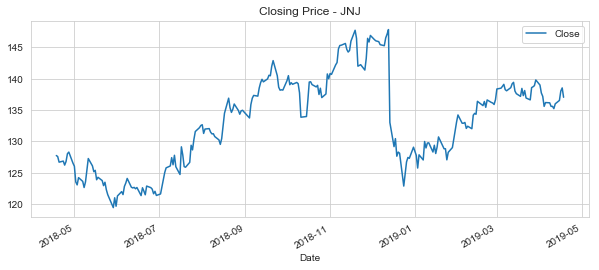

In [69]:
# Let's see a historical view of the closing price for JNJ Jonhson and Johnson
JNJ['Close'].plot(title='Closing Price - JNJ',legend=True, figsize=(10,4))

In [70]:
# We'll use pct_change to find the percent change for each day
#For JNJ stocks
JNJ['Daily Return'] = JNJ['Close'].pct_change()

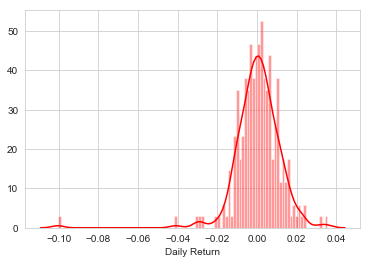

In [71]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(JNJ['Daily Return'].dropna(),bins=100,color='R')

In [72]:
(JNJ['Daily Return'].dropna()).quantile(0.05)

-0.014078051002604458

In [73]:
# For WMT stocks
WMT['Daily Return'] = WMT['Close'].pct_change()

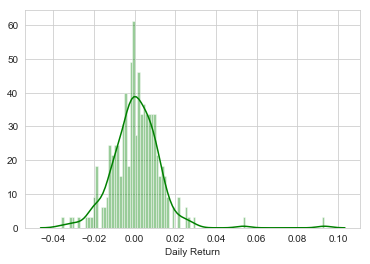

In [74]:
sns.distplot(WMT['Daily Return'].dropna(),bins=100,color='G')

In [75]:
(WMT['Daily Return'].dropna()).quantile(0.05)

-0.018967000959611853

In [76]:
# For NKE stocks
NKE['Daily Return'] = NKE['Close'].pct_change()

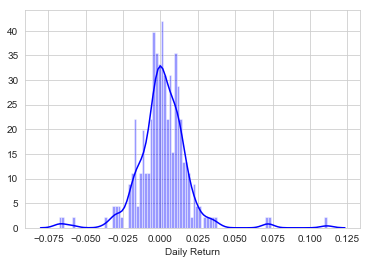

In [77]:
sns.distplot(NKE['Daily Return'].dropna(),bins=100,color='B')

In [78]:
(NKE['Daily Return'].dropna()).quantile(0.05)

-0.020317660284974514